In [1]:
import pandas as pd
import numpy as np



In [2]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read JSON files and extract data
def read_accuracies(base_dir):
    data = []
    
    # Walk through directories
    for dirname in os.listdir(base_dir):
        if dirname.startswith('fold3_cell_type_'):
            # Extract batch size from directory name
            batch_size = int(dirname.split('_')[-1])
            
            # Read JSON file
            json_path = os.path.join(base_dir, dirname, 'cell_type_accuracies.json')
            if os.path.exists(json_path):
                with open(json_path, 'r') as f:
                    accuracies = json.load(f)
                    
                # Create entries for each cell type
                for cell_type, accuracy in accuracies.items():
                    if cell_type in ["ENT DL", "NA"]:
                        continue

                    data.append({
                        'batch_size': batch_size,
                        'cell_type': cell_type,
                        'accuracy': accuracy
                    })
    
    return pd.DataFrame(data)



In [3]:
df = read_accuracies('../../outputs/')
df.head()

,batch_size,cell_type,accuracy
0,4,Car3,0.463369
1,4,L2/3 IT,0.418146
2,4,L4/5 IT,0.462981
3,4,L5 ET,0.494938
4,4,L5 IT,0.455471


[Text(0, 0.0, '0.0'), Text(0, 0.2, '0.2'), Text(0, 0.4, '0.4'), Text(0, 0.6000000000000001, '0.6'), Text(0, 0.8, '0.8'), Text(0, 1.0, '1.0')]


/tmp/ipykernel_1786228/2946372183.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(100*float(label.get_text()))}' for label in ax.get_yticklabels()])


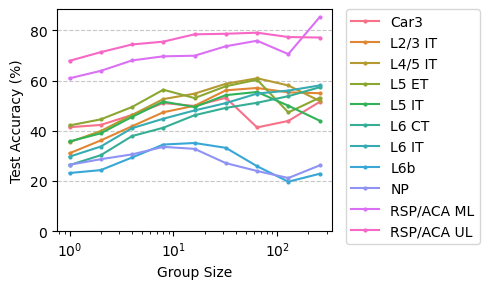

In [5]:
# sns.set_style("whitegrid")
plt.figure(figsize=(5, 3))

sns.lineplot(data=df, 
            x='batch_size', 
            y='accuracy', 
            hue='cell_type',
            marker='.',
            markeredgecolor='none')

# Customize the plot
plt.xlabel('Group Size')
plt.ylabel('Test Accuracy (%)')

# Rotate x-axis labels if needed
# plt.xticks(rotation=45)

# Move legend to a better position
plt.legend(loc='lower right')
plt.ylim(0, plt.ylim()[1])


# Relabel the y-axis ticks to multiply the labels by 100
ax = plt.gca()
print(ax.get_yticklabels())
# current_labels = ax.get_yticks()
# ax.set_yticklabels([f'{int(label * 100)}' for label in current_labels])
ax.set_yticklabels([f'{int(100*float(label.get_text()))}' for label in ax.get_yticklabels()])
# ax.grid(None)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()


# Rotate legend labels if needed
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Adjust layout to prevent legend cutoff WITHOUT using tight_layout
plt.subplots_adjust(right=0.75)
plt.tight_layout()
# # Save plot with a better filename indicating the context
plt.savefig('fig_1g_cell_type_accuracy_by_batch_size.png', bbox_inches='tight', dpi=300)
plt.savefig('fig_1g_cell_type_accuracy_by_batch_size.pdf', bbox_inches='tight')
plt.xscale('log')
plt.tight_layout()
plt.savefig(f"fig_1g_cell_type_accuracy_by_batch_size_log.png", dpi=300)
plt.savefig(f"fig_1g_cell_type_accuracy_by_batch_size_log.pdf")
plt.show()
